In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

In [2]:
z0 = 1.5
dz = 0.5
betas = 0.10
waist = -0.385681
hw = 0.139981
N = 3000
sigma = hw/(np.sqrt(2*np.log(2)))
beta0 = betas+(z0+waist)**2/betas
alpha0 = (z0+waist)/betas
gb0 = 20000
ne0 = 0.5
dgdz0 = 16.7e9/me/1e6
z, frac = profile.plasma_gaussian_ramps(z0, dz, sigma, sigma, N, 2*z0+dz)
ne = frac*0.5
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

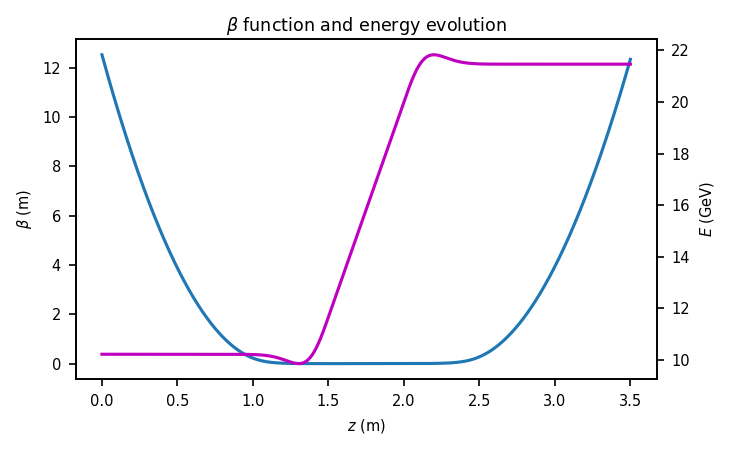

In [3]:
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.title(r'$\beta$ function and energy evolution')
plt.xlabel(r'$z$ (m)')
plt.ylabel(r'$\beta$ (m)')
plt.twinx()
plt.plot(z, np.array(gb)*me*1e-3, 'm')
plt.ylabel(r'$E$ (GeV)')
plt.show()

In [4]:
# First lets define a function that takes an input waist location and halfwidth and return Bmag
def bmag(x):
    waist = x[0]
    hw = x[1]
    z0 = 1.5
    dz = 0.5
    betas = 0.10
    N = 1500
    sigma = hw/(np.sqrt(2*np.log(2)))
    beta0 = betas+(z0+waist)**2/betas
    alpha0 = (z0+waist)/betas
    gb0 = 20000
    ne0 = 0.5
    dgdz0 = 16.7e9/me/1e6
    z, frac = profile.plasma_gaussian_ramps(z0, dz, sigma, sigma, N, z0)
    ne = frac*0.5
    beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
    kp = 5.95074e4 * np.sqrt(ne0)
    kb = kp/np.sqrt(2*gb[-1])
    Bmag = 0.5*(beta[-1]*kb+gamma[-1]/kb)
    return Bmag
print(bmag([-0.35, 0.13]))

1.00289740603


In [5]:
x0 = [-0.25, 0.20]
res = minimize(bmag, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
print('Optimal waist: %0.6f, Optimal hw: %0.6f' % (res.x[0], res.x[1]))

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 67
         Function evaluations: 130
Optimal waist: -0.385684, Optimal hw: 0.139982
